# Classical RNA velocity vs. labeling approach - TSI

## Library imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

import pandas as pd

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

from cr2.analysis import plot_tsi

sys.path.extend(["../../", "."])
from paths import DATA_DIR, FIG_DIR  # isort: skip  # noqa: E402

Global seed set to 0


## General settings

In [3]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    (FIG_DIR / "labeling_kernel").mkdir(parents=True, exist_ok=True)

FIGURE_FORMAT = "pdf"

## Constants

## Data loading

In [4]:
tsi_cr1 = pd.read_csv(DATA_DIR / "sceu_organoid" / "results" / "tsi-em_model.csv")
tsi_cr1.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,18,4,4
1,17,3,4
2,16,3,4
3,15,3,4
4,14,3,4


In [5]:
tsi_cr2 = pd.read_csv(DATA_DIR / "sceu_organoid" / "results" / "tsi-labeling_approach.csv")
tsi_cr2.head()

,number_of_macrostates,identified_terminal_states,optimal_identification
0,17,4,4
1,16,4,4
2,15,4,4
3,14,4,4
4,13,4,4


## Data preprocessing

In [6]:
tsi_cr1["method"] = "CellRank 1"
tsi_cr2["method"] = "CellRank 2"
df = pd.concat([tsi_cr1, tsi_cr2])

## Plotting

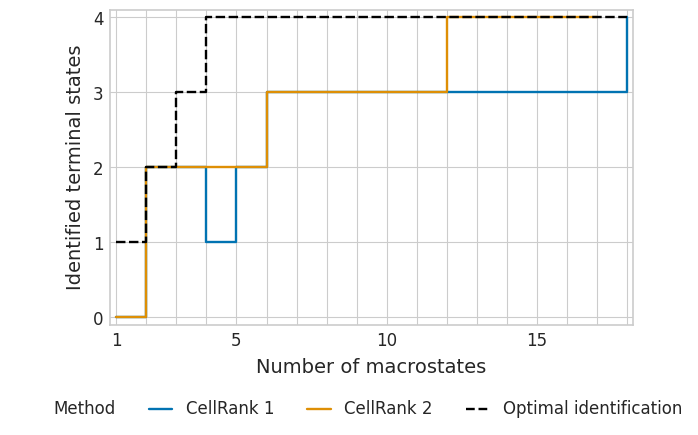

In [7]:
palette = {"CellRank 1": "#0173b2", "CellRank 2": "#DE8F05", "Optimal identification": "#000000"}

if SAVE_FIGURES:
    fname = FIG_DIR / "labeling_kernel" / f"tsi_ranking.{FIGURE_FORMAT}"
else:
    fname = None

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    plot_tsi(df=df, palette=palette, fname=fname)
    plt.show()